#Hands-on Activity 11.2 Classification using Logistic Regression

##Objective(s):
This activity aims to demonstrate how to apply simple linear regression analysis to solve regression problem



##Intended Learning Outcomes (ILOs):
- Demonstrate how to solve classification problems using Logistic Regression
- Use the logistic regression model to perform classification

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cervical_cancer_risk_factors = fetch_ucirepo(id=383)

# data (as pandas dataframes)
X = cervical_cancer_risk_factors.data.features
y = cervical_cancer_risk_factors.data.targets

# metadata
print(cervical_cancer_risk_factors.metadata)

# variable information
print(cervical_cancer_risk_factors.variables)

{'uci_id': 383, 'name': 'Cervical Cancer (Risk Factors)', 'repository_url': 'https://archive.ics.uci.edu/dataset/383/cervical+cancer+risk+factors', 'data_url': 'https://archive.ics.uci.edu/static/public/383/data.csv', 'abstract': 'This dataset focuses on the prediction of indicators/diagnosis of cervical cancer. The features cover demographic information, habits, and historic medical records.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 858, 'num_features': 36, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Other'], 'target_col': None, 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2017, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5Z310', 'creators': ['Kelwin Fernandes', 'Jaime Cardoso', 'Jessica Fernandes'], 'intro_paper': {'title': 'Transfer Learning with Partial Observability Applied to Cervical Cancer Screening', 'autho

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

# For example, here's several helpful packages to Load in

import numpy as np # Linear algebra
import pandas as pd # data processing, CSV file I/0 (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

# Input data files are available in the " .. /input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
 for filename in filenames:
  print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
x1 = pd.DataFrame(X)
y1 = pd.DataFrame(y)
df = pd.concat([x1, y1], axis= 1)
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(858, 36)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [ ]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype == 'O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 0 categorical variables

The categorical variables are : []


There is no categorical variables

In [ ]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype !='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 36 numerical variables

The numerical variables are : ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']


In [ ]:
df[numerical].head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [ ]:
# check missing values in numerical
df[numerical].isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [ ]:
print(round(df[numerical].describe()),2)

         Age  Number of sexual partners  First sexual intercourse  \
count  858.0                      832.0                     851.0   
mean    27.0                        3.0                      17.0   
std      8.0                        2.0                       3.0   
min     13.0                        1.0                      10.0   
25%     20.0                        2.0                      15.0   
50%     25.0                        2.0                      17.0   
75%     32.0                        3.0                      18.0   
max     84.0                       28.0                      32.0   

       Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
count               802.0   845.0           845.0                845.0   
mean                  2.0     0.0             1.0                  0.0   
std                   1.0     0.0             4.0                  2.0   
min                   0.0     0.0             0.0                  0.0   
25%     

In [ ]:
# funtion for finding the columns that contains ouliers
def col_outliers(df):
    col_outliers=[]
    for i in df.columns:
        if df[i].isnull().any():
            low_bound = df[i].quantile(0.25) - (1.5 * (df[i].quantile(0.75) - df[i].quantile(0.25)))
            upper_bound = df[i].quantile(0.75) + (1.5 * (df[i].quantile(0.75) - df[i].quantile(0.25)))
            if ((df[i] < low_bound) |  (df[i] > upper_bound)).any():
                col_outliers.append(i)
    return col_outliers

In [ ]:
ouliers_col = col_outliers(df)

In [ ]:
ouliers_col

['Number of sexual partners',
 'First sexual intercourse',
 'Num of pregnancies',
 'Smokes',
 'Smokes (years)',
 'Smokes (packs/year)',
 'Hormonal Contraceptives (years)',
 'IUD',
 'IUD (years)',
 'STDs',
 'STDs (number)',
 'STDs:condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV',
 'STDs: Time since first diagnosis',
 'STDs: Time since last diagnosis']

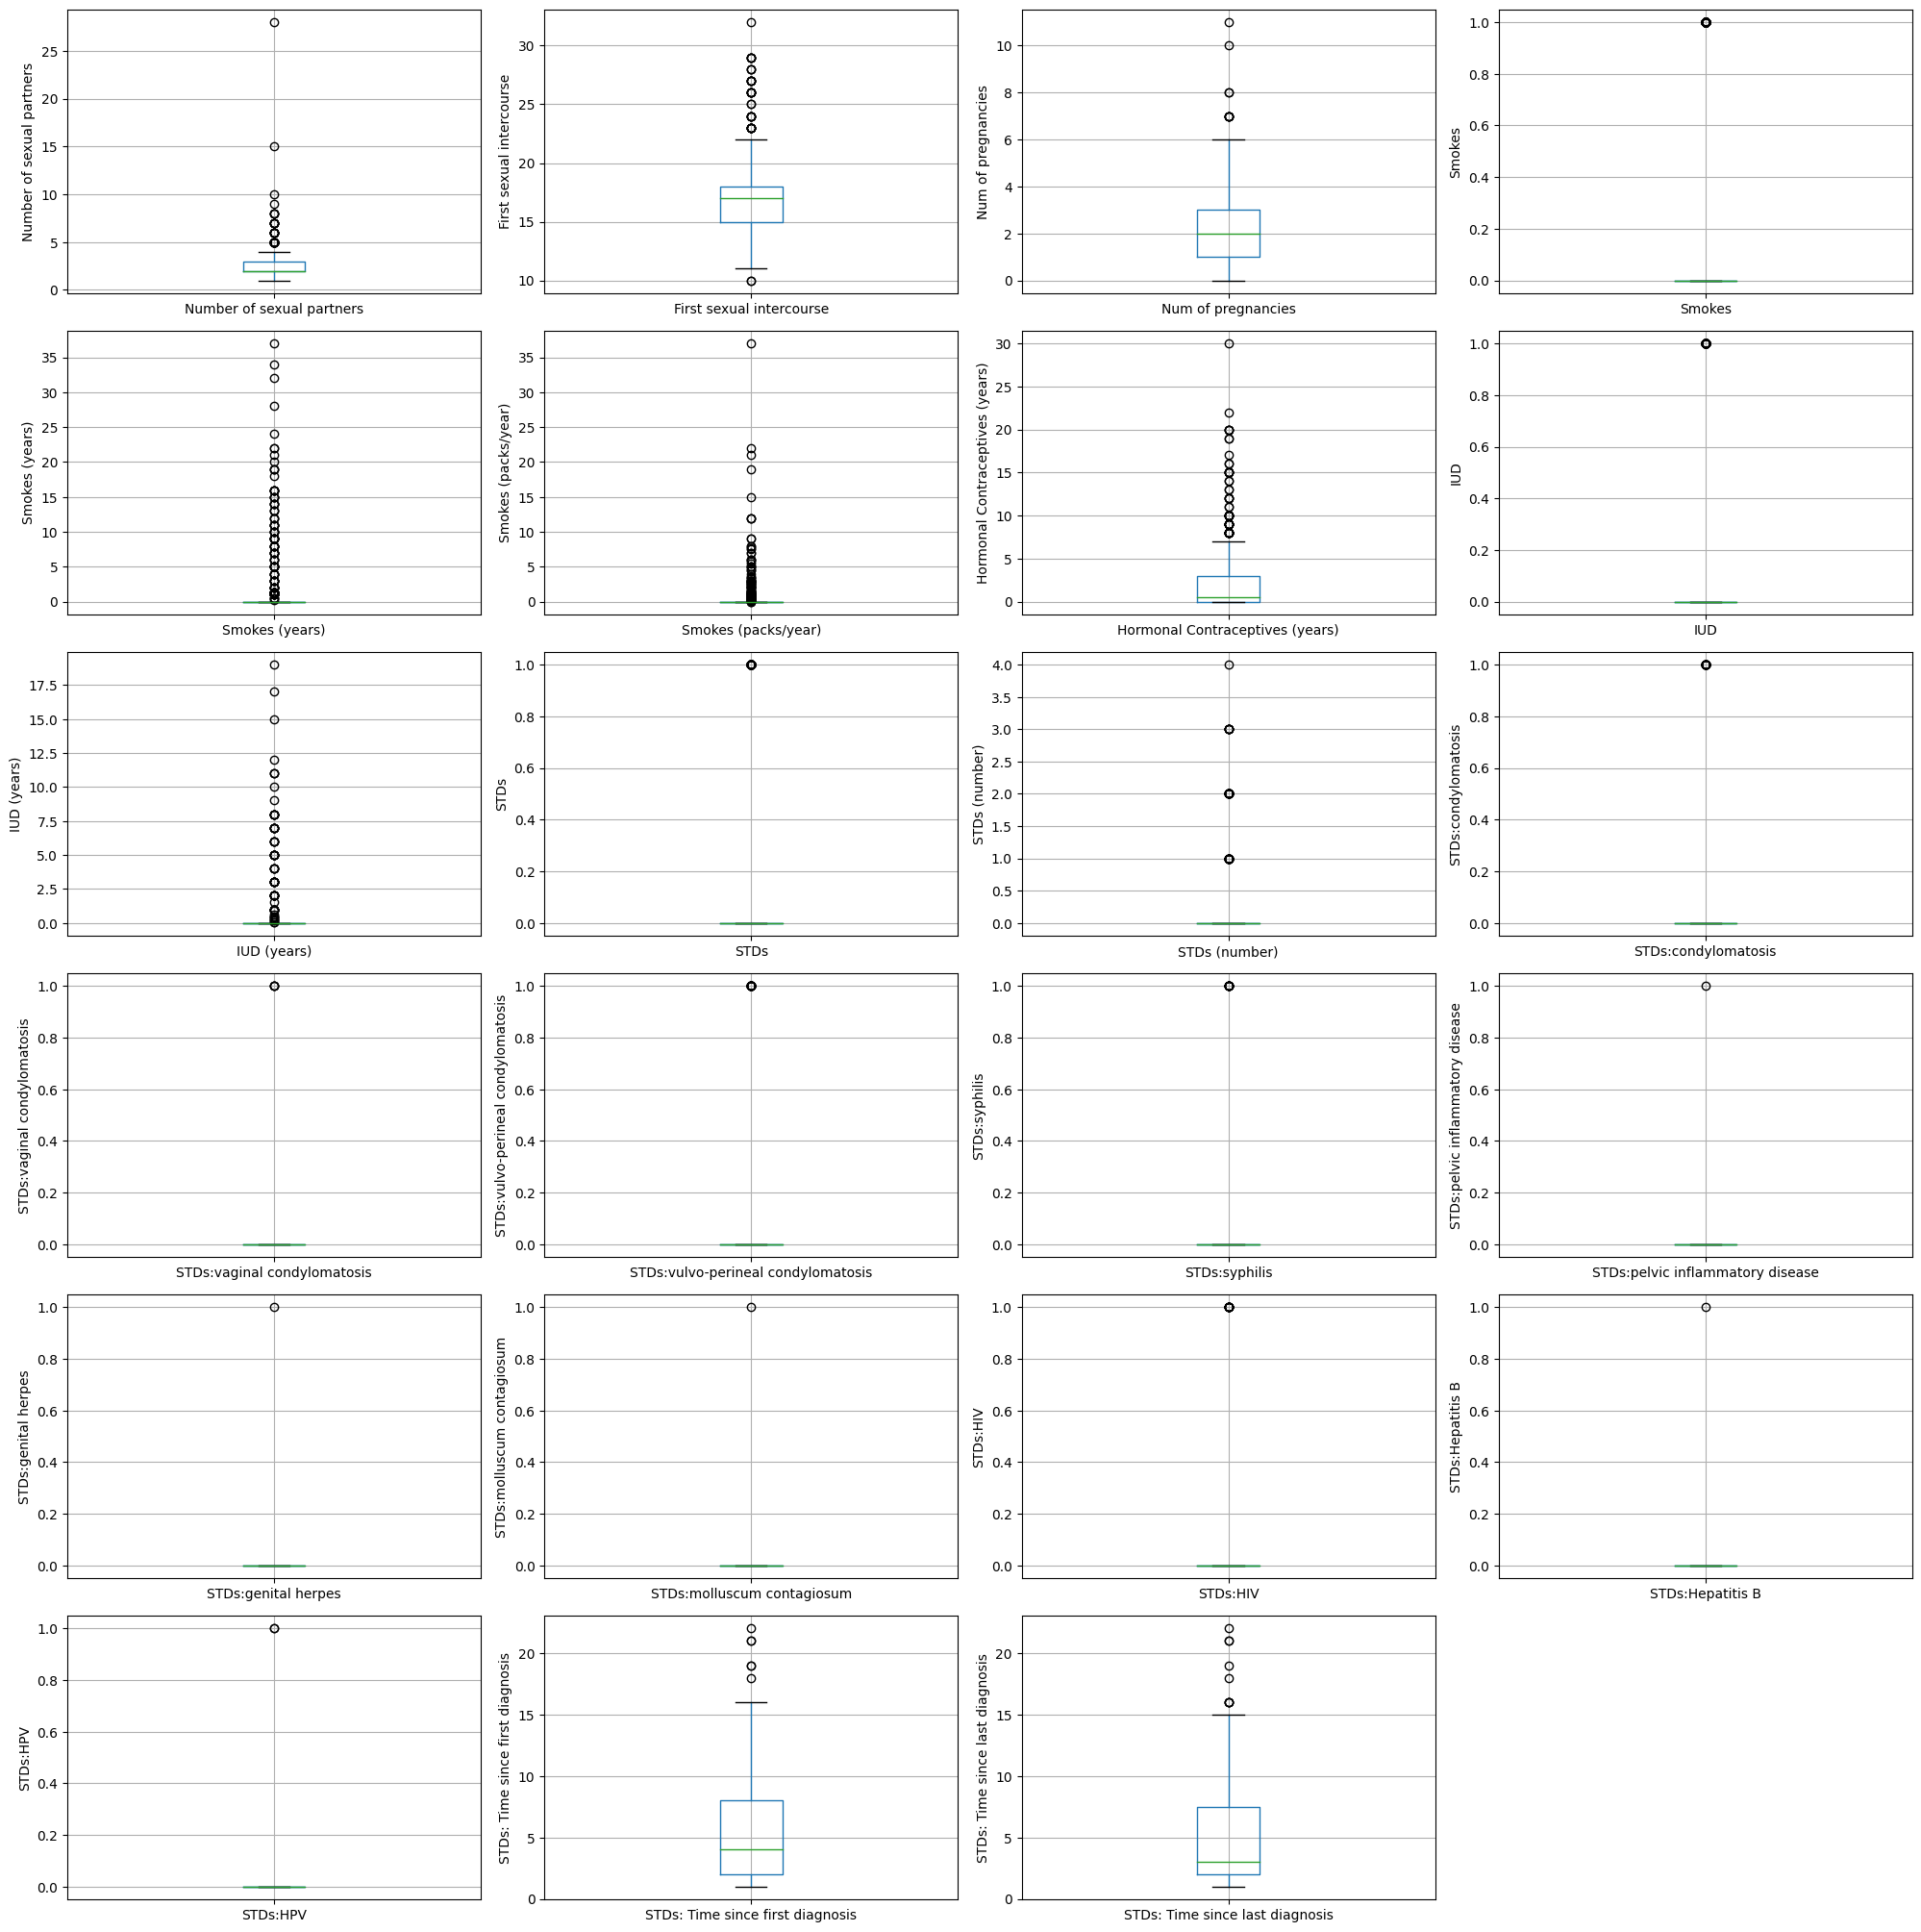

In [ ]:
num_rows = 12
num_cols = 4
total_plots =num_rows *num_cols

plt.figure(figsize=(20, 40))

for i, column in enumerate(df[ouliers_col].columns[:total_plots], 1):
  plt.subplot(num_rows, num_cols, i)
  fig =df.boxplot(column=column)
  fig.set_title("")
  fig.set_ylabel(column)

plt.tight_layout()

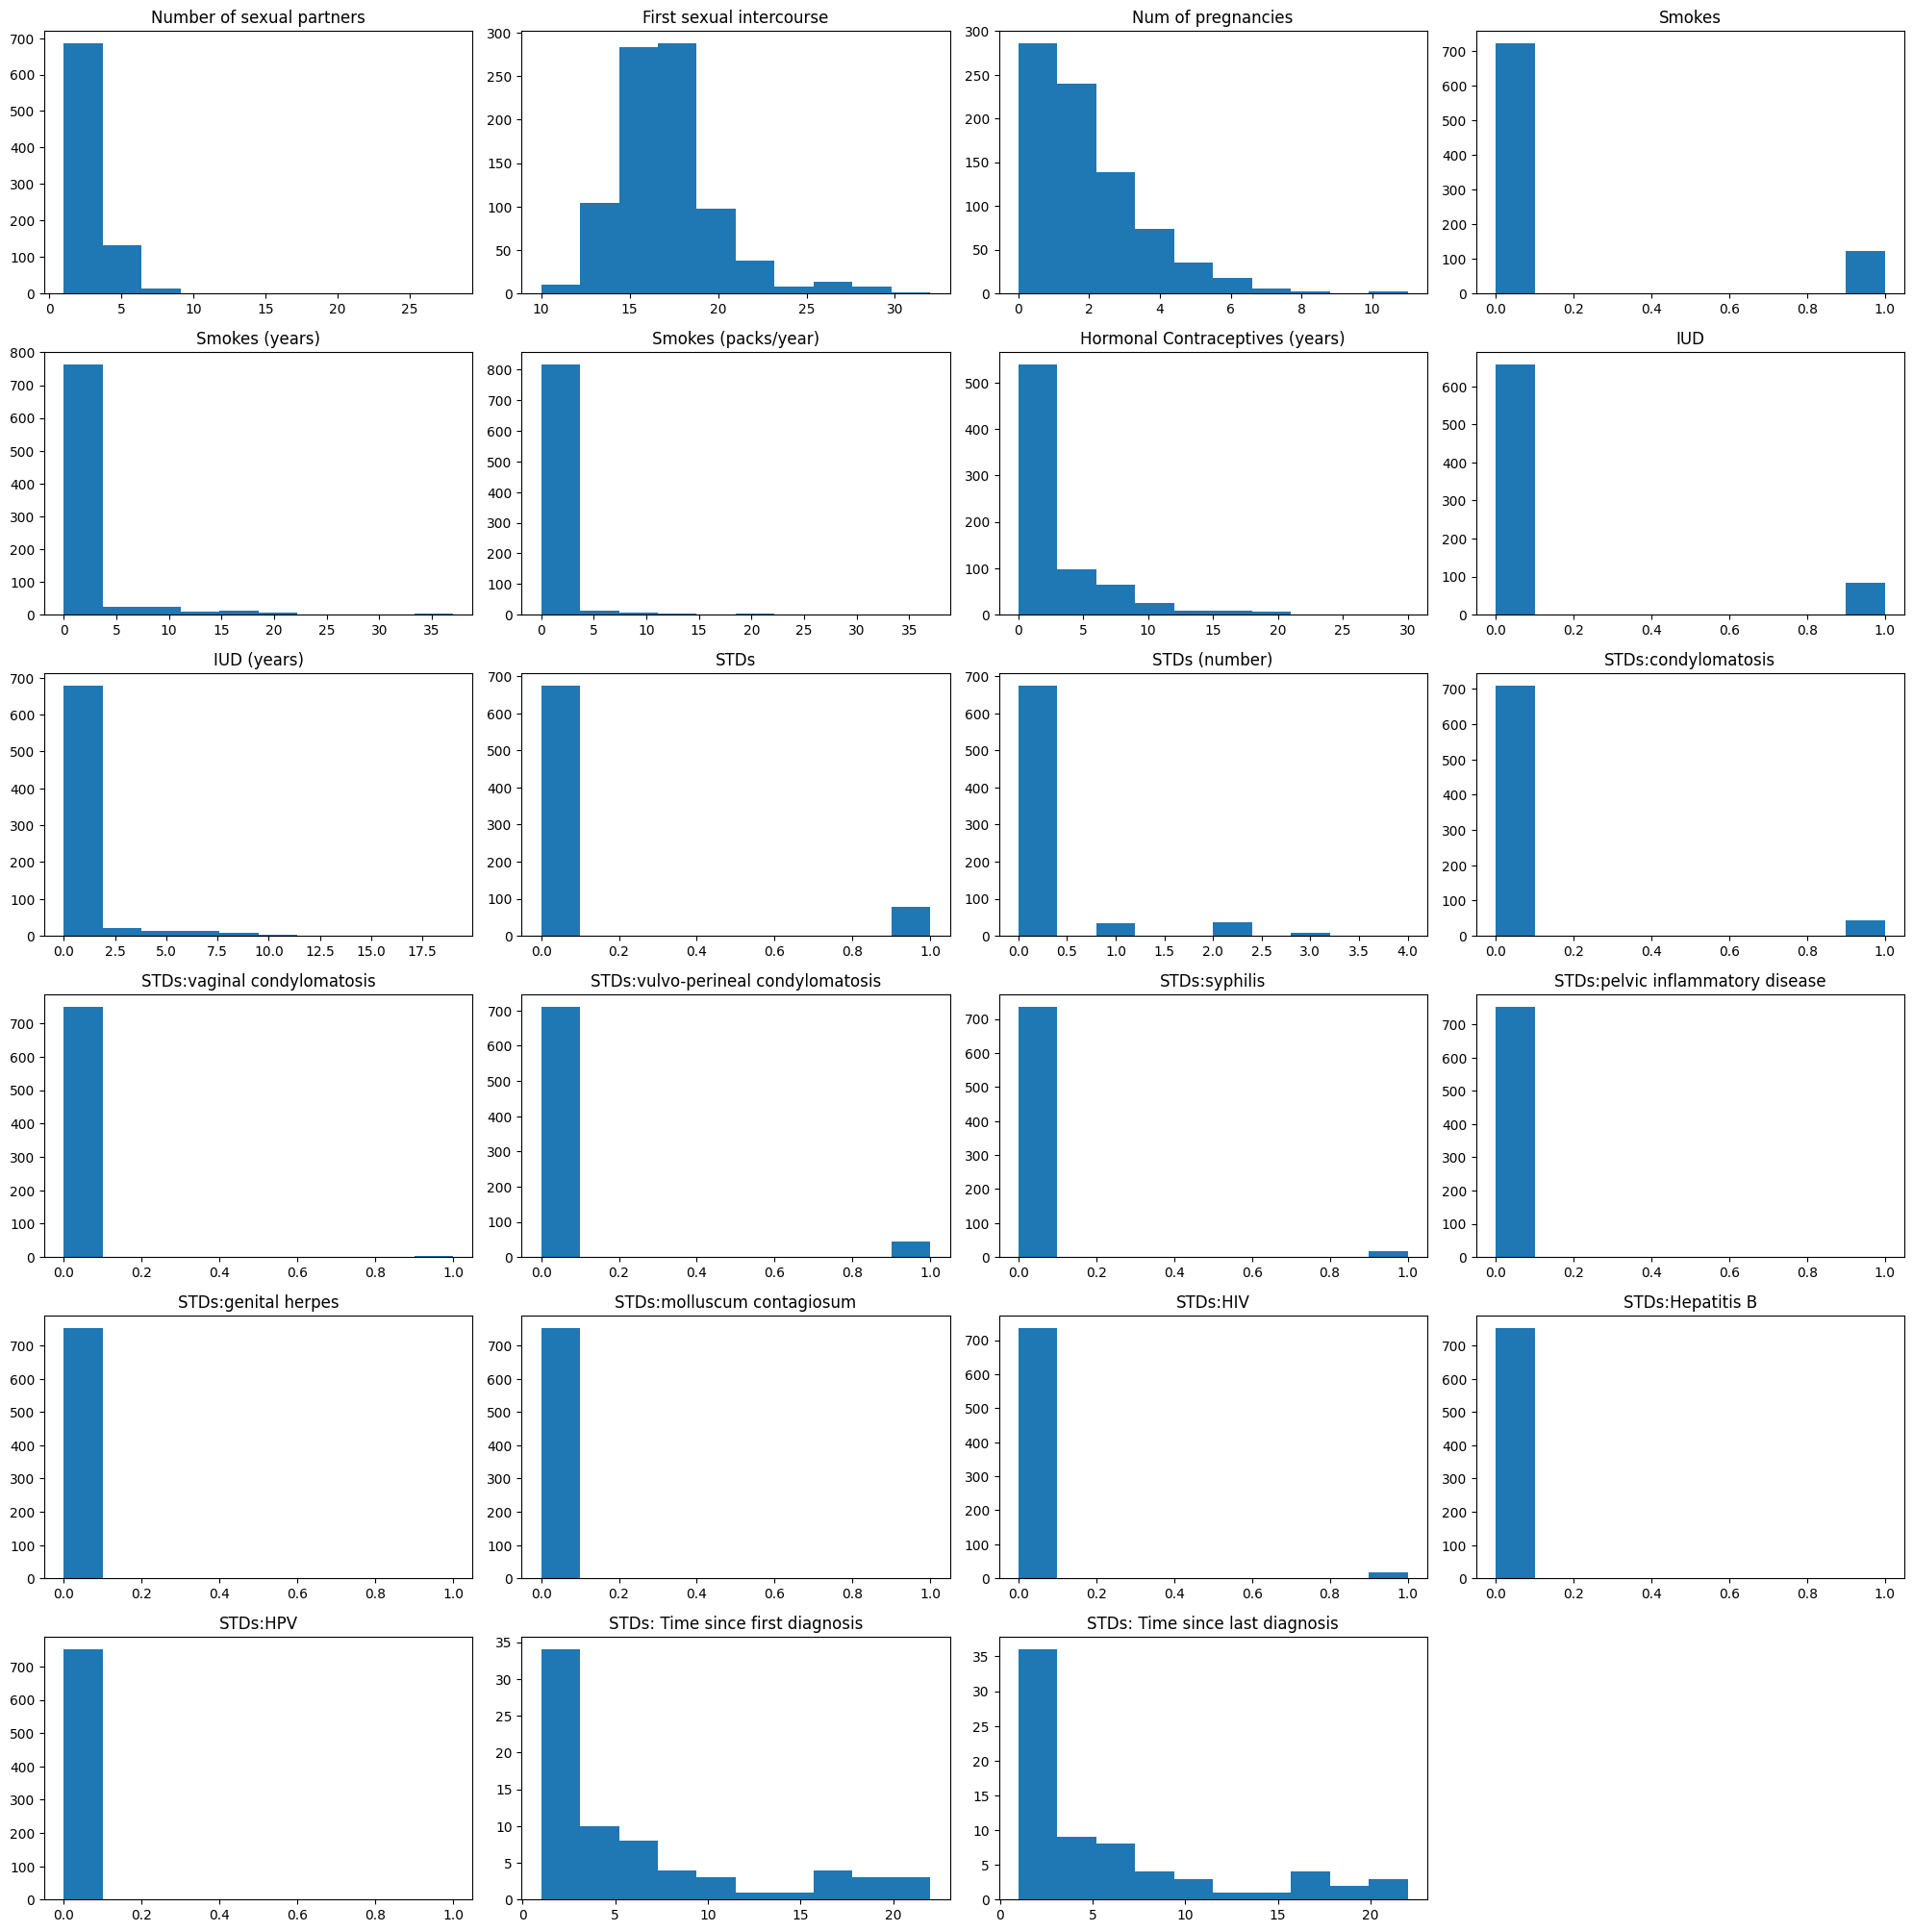

In [ ]:
num_rows = 12
num_cols = 4
total_plots = num_rows * num_cols

plt.figure(figsize=(20, 40))

for i, column in enumerate(df[ouliers_col].columns[:total_plots], 1):
    plt.subplot(num_rows, num_cols, i)
    plt.hist(df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [ ]:
X= df.drop(['Hinselmann'], axis=1)

y = df['Hinselmann']

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# check the shape of Xtrain and X_test

X_train.shape, X_test.shape

((686, 35), (172, 35))

In [ ]:
# check data types in X_train

X_train.dtypes

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

In [ ]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

[]

In [ ]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['Age',
 'Number of sexual partners',
 'First sexual intercourse',
 'Num of pregnancies',
 'Smokes',
 'Smokes (years)',
 'Smokes (packs/year)',
 'Hormonal Contraceptives',
 'Hormonal Contraceptives (years)',
 'IUD',
 'IUD (years)',
 'STDs',
 'STDs (number)',
 'STDs:condylomatosis',
 'STDs:cervical condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:AIDS',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV',
 'STDs: Number of diagnosis',
 'STDs: Time since first diagnosis',
 'STDs: Time since last diagnosis',
 'Dx:Cancer',
 'Dx:CIN',
 'Dx:HPV',
 'Dx',
 'Schiller',
 'Citology',
 'Biopsy']

In [ ]:
X_train[numerical].isnull().sum()

Age                                     0
Number of sexual partners              22
First sexual intercourse                6
Num of pregnancies                     44
Smokes                                 11
Smokes (years)                         11
Smokes (packs/year)                    11
Hormonal Contraceptives                85
Hormonal Contraceptives (years)        85
IUD                                    92
IUD (years)                            92
STDs                                   81
STDs (number)                          81
STDs:condylomatosis                    81
STDs:cervical condylomatosis           81
STDs:vaginal condylomatosis            81
STDs:vulvo-perineal condylomatosis     81
STDs:syphilis                          81
STDs:pelvic inflammatory disease       81
STDs:genital herpes                    81
STDs:molluscum contagiosum             81
STDs:AIDS                              81
STDs:HIV                               81
STDs:Hepatitis B                  

In [ ]:
X_test[numerical].isnull().sum()

Age                                     0
Number of sexual partners               4
First sexual intercourse                1
Num of pregnancies                     12
Smokes                                  2
Smokes (years)                          2
Smokes (packs/year)                     2
Hormonal Contraceptives                23
Hormonal Contraceptives (years)        23
IUD                                    25
IUD (years)                            25
STDs                                   24
STDs (number)                          24
STDs:condylomatosis                    24
STDs:cervical condylomatosis           24
STDs:vaginal condylomatosis            24
STDs:vulvo-perineal condylomatosis     24
STDs:syphilis                          24
STDs:pelvic inflammatory disease       24
STDs:genital herpes                    24
STDs:molluscum contagiosum             24
STDs:AIDS                              24
STDs:HIV                               24
STDs:Hepatitis B                  

In [ ]:
# print percentage of missing values in the numerical variables in training set

for col in numerical:
    if X_train[col].isnull().mean()>0:
      print(col, round(X_train[col].isnull().mean(),4))

Number of sexual partners 0.0321
First sexual intercourse 0.0087
Num of pregnancies 0.0641
Smokes 0.016
Smokes (years) 0.016
Smokes (packs/year) 0.016
Hormonal Contraceptives 0.1239
Hormonal Contraceptives (years) 0.1239
IUD 0.1341
IUD (years) 0.1341
STDs 0.1181
STDs (number) 0.1181
STDs:condylomatosis 0.1181
STDs:cervical condylomatosis 0.1181
STDs:vaginal condylomatosis 0.1181
STDs:vulvo-perineal condylomatosis 0.1181
STDs:syphilis 0.1181
STDs:pelvic inflammatory disease 0.1181
STDs:genital herpes 0.1181
STDs:molluscum contagiosum 0.1181
STDs:AIDS 0.1181
STDs:HIV 0.1181
STDs:Hepatitis B 0.1181
STDs:HPV 0.1181
STDs: Time since first diagnosis 0.9125
STDs: Time since last diagnosis 0.9125


In [ ]:
# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
  for col in numerical:
      col_median=X_train[col].median()
      df1[col].fillna(col_median, inplace=True)

In [ ]:
X_test[numerical].isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [ ]:
X_train[numerical].isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [ ]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Age'] = max_value(df3, 'Age', 3.2)
    df3['IUD'] = max_value(df3, 'IUD', 21.8)
    df3['STDs'] = max_value(df3, 'STDs', 55)
    df3['Smokes'] = max_value(df3, 'Smokes', 57)

In [ ]:
X_train.Age.max(), X_test.Age.max()

(3.2, 3.2)

In [ ]:
X_train.IUD.max(), X_test.IUD.max()

(1.0, 1.0)

In [ ]:
X_train.STDs.max(), X_test.STDs.max()

(1.0, 1.0)

In [ ]:
X_train.Smokes.max(), X_test.Smokes.max()

(1.0, 1.0)

In [ ]:
X_train[numerical].describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Schiller,Citology,Biopsy
count,6.860000e+02,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,...,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,3.200000e+00,2.550729,16.931487,2.269679,0.144315,1.191832,0.482925,0.683673,2.098531,0.094752,...,0.091837,3.758017,3.272595,0.024781,0.011662,0.024781,0.032070,0.094752,0.046647,0.068513
std,4.444132e-16,1.572563,2.806088,1.379257,0.351665,3.960110,2.372255,0.465381,3.574475,0.293086,...,0.308550,2.017924,1.995625,0.155572,0.107437,0.155572,0.176315,0.293086,0.211036,0.252809
min,3.200000e+00,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000e+00,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.200000e+00,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.000000,3.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.200000e+00,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,3.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.200000e+00,21.800000,32.000000,10.000000,1.000000,37.000000,37.000000,1.000000,22.000000,1.000000,...,3.000000,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Schiller,Citology,Biopsy
count,6.860000e+02,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,...,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,3.200000e+00,2.550729,16.931487,2.269679,0.144315,1.191832,0.482925,0.683673,2.098531,0.094752,...,0.091837,3.758017,3.272595,0.024781,0.011662,0.024781,0.032070,0.094752,0.046647,0.068513
std,4.444132e-16,1.572563,2.806088,1.379257,0.351665,3.960110,2.372255,0.465381,3.574475,0.293086,...,0.308550,2.017924,1.995625,0.155572,0.107437,0.155572,0.176315,0.293086,0.211036,0.252809
min,3.200000e+00,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000e+00,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.200000e+00,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.000000,3.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.200000e+00,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,3.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.200000e+00,21.800000,32.000000,10.000000,1.000000,37.000000,37.000000,1.000000,22.000000,1.000000,...,3.000000,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Schiller,Citology,Biopsy
count,686.0,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,...,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,0.0,0.074554,0.315068,0.226968,0.144315,0.032212,0.013052,0.683673,0.095388,0.094752,...,0.030612,0.131334,0.108219,0.024781,0.011662,0.024781,0.032070,0.094752,0.046647,0.068513
std,0.0,0.075604,0.127549,0.137926,0.351665,0.107030,0.064115,0.465381,0.162476,0.293086,...,0.102850,0.096092,0.095030,0.155572,0.107437,0.155572,0.176315,0.293086,0.211036,0.252809
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.048077,0.227273,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.119048,0.095238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.048077,0.318182,0.200000,0.000000,0.000000,0.000000,1.000000,0.022727,0.000000,...,0.000000,0.119048,0.095238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.096154,0.363636,0.300000,0.000000,0.000000,0.000000,1.000000,0.136364,0.000000,...,0.000000,0.119048,0.095238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# train a logistic regression model on the training set
from sklearn. linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)

# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
logreg.predict_proba(X_test)[:,0]

array([0.98815011, 0.98650428, 0.9908873 , 0.99423984, 0.98995631,
       0.99228011, 0.98623736, 0.98909789, 0.98810908, 0.99107294,
       0.98892123, 0.99250647, 0.98575585, 0.98892848, 0.98808553,
       0.99308191, 0.98717268, 0.98716051, 0.95523731, 0.99000156,
       0.98870767, 0.99248721, 0.98970208, 0.98949514, 0.99201296,
       0.99424829, 0.98972207, 0.98828652, 0.98872524, 0.80643684,
       0.98736144, 0.98822433, 0.98952825, 0.98898803, 0.99209813,
       0.98902359, 0.98479262, 0.99087835, 0.98635445, 0.9893547 ,
       0.98957777, 0.99166888, 0.98835054, 0.98851164, 0.98654662,
       0.96833601, 0.98899193, 0.98812131, 0.98203308, 0.98797684,
       0.98642728, 0.99283472, 0.9890853 , 0.98979074, 0.98922932,
       0.98718442, 0.99049776, 0.99011746, 0.48015489, 0.98567946,
       0.98394076, 0.35465779, 0.98592639, 0.98629343, 0.9893039 ,
       0.98973506, 0.99075903, 0.98726726, 0.98957781, 0.99000156,
       0.98725289, 0.98874534, 0.99096186, 0.98749622, 0.98983

In [ ]:
logreg.predict_proba(X_test)[:,1]

array([0.01184989, 0.01349572, 0.0091127 , 0.00576016, 0.01004369,
       0.00771989, 0.01376264, 0.01090211, 0.01189092, 0.00892706,
       0.01107877, 0.00749353, 0.01424415, 0.01107152, 0.01191447,
       0.00691809, 0.01282732, 0.01283949, 0.04476269, 0.00999844,
       0.01129233, 0.00751279, 0.01029792, 0.01050486, 0.00798704,
       0.00575171, 0.01027793, 0.01171348, 0.01127476, 0.19356316,
       0.01263856, 0.01177567, 0.01047175, 0.01101197, 0.00790187,
       0.01097641, 0.01520738, 0.00912165, 0.01364555, 0.0106453 ,
       0.01042223, 0.00833112, 0.01164946, 0.01148836, 0.01345338,
       0.03166399, 0.01100807, 0.01187869, 0.01796692, 0.01202316,
       0.01357272, 0.00716528, 0.0109147 , 0.01020926, 0.01077068,
       0.01281558, 0.00950224, 0.00988254, 0.51984511, 0.01432054,
       0.01605924, 0.64534221, 0.01407361, 0.01370657, 0.0106961 ,
       0.01026494, 0.00924097, 0.01273274, 0.01042219, 0.00999844,
       0.01274711, 0.01125466, 0.00903814, 0.01250378, 0.01016

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9535


In [ ]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9679


In [ ]:
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))


Training set score: 0.9679
Test set score: 0.9535


In [ ]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)
# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [ ]:
# print the scores on training and test set

print('Training set score: { :. 4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: { :. 4f}'.format(logreg100.score(X_test, y_test)))

In [ ]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))


Training set score: 0.9519
Test set score: 0.9884


In [ ]:
# check class distribution in test set

y_test.value_counts()

Hinselmann
0    170
1      2
Name: count, dtype: int64

In [ ]:
# check null accuracy score

null_accuracy = (22067/(22067+6372))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7759


In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) =', cm[1,1])

print('\nFalse Positives(FP) =', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[164   6]
 [  2   0]]

True Positives(TP) =  164

True Negatives(TN) = 0

False Positives(FP) = 6

False Negatives(FN) =  2


<Axes: >

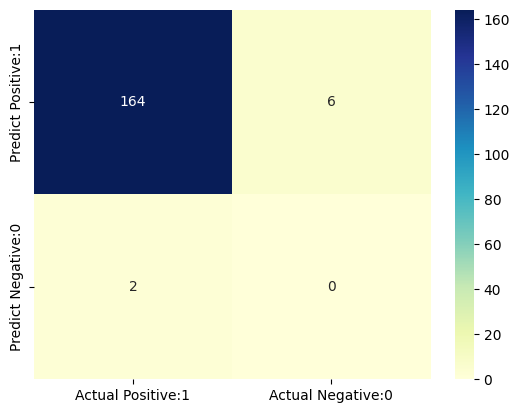

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       170
           1       0.00      0.00      0.00         2

    accuracy                           0.95       172
   macro avg       0.49      0.48      0.49       172
weighted avg       0.98      0.95      0.96       172



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9535


In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0465


In [ ]:
# print precision score

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9647


In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9880


In [ ]:
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9880


In [ ]:
false_positive_rate = FP / float(FP + TN)

print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 1.0000


In [ ]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.0000


In [ ]:
logreg.predict_proba(X_test)[0:10, 1]

array([0.01184989, 0.01349572, 0.0091127 , 0.00576016, 0.01004369,
       0.00771989, 0.01376264, 0.01090211, 0.01189092, 0.00892706])

In [ ]:
y_pred1 = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

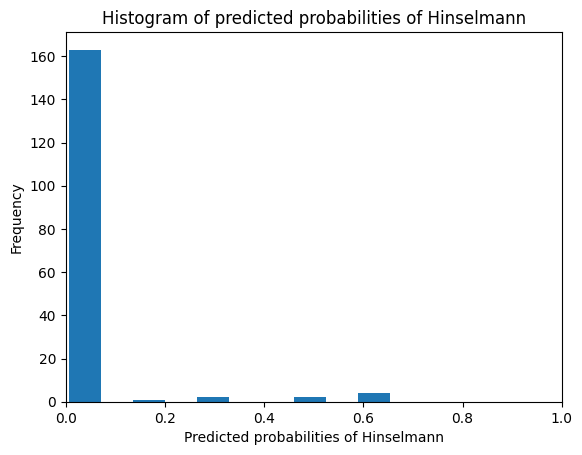

In [ ]:
# plot histogrom with 10 bins
plt.hist(y_pred1, bins = 10)

# set the title of predicted probabilities
plt. title('Histogram of predicted probabilities of Hinselmann')

# set the x-axis limit
plt.xlim(0,1)

# set the title
plt.xlabel('Predicted probabilities of Hinselmann')
plt.ylabel('Frequency')

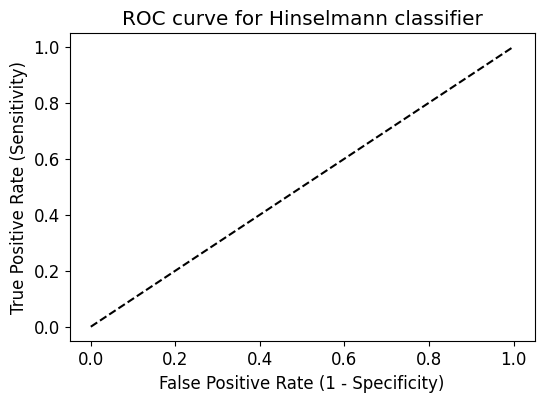

In [ ]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'Yes')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt. title('ROC curve for Hinselmann classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [ ]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC: {:.4f}'.format(ROC_AUC))

ROC AUC: 0.6618


In [ ]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format (scores))

Cross-validation scores:[0.94927536 0.95620438 0.96350365 0.94160584 0.96350365]


In [ ]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9548


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters =[{'penalty':['l1', 'l2']},
{'C':[1, 10, 100, 1000]}]

grid_search = GridSearchCV(estimator = logreg,
param_grid = parameters,
scoring = 'accuracy',
cv = 5,
verbose=0)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [ ]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : { :. 4f}','\n\n'.format(grid_search.best_score_))

# print parameters that give the best results



print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : { :. 4f} 


Parameters that give the best results : 

 {'penalty': 'l1'}


Estimator that was chosen by the search : 

 LogisticRegression(penalty='l1', random_state=0, solver='liblinear')


In [ ]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.9535
